Using Decision Tree 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data pre-processing :

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Fitting decision tree algorithm using training data :

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop('Purchased',axis = 1)
Y = df['Purchased']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

classifier = DecisionTreeClassifier(criterion='entropy')
model =  classifier.fit(x_train, y_train)

Predicting the test set results :

In [13]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

Evaluate performance of the model : 

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [15]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[48,  4],
       [ 6, 22]], dtype=int64)

In [16]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        52
           1       0.85      0.79      0.81        28

    accuracy                           0.88        80
   macro avg       0.87      0.85      0.86        80
weighted avg       0.87      0.88      0.87        80



In [17]:
score = accuracy_score(y_test,y_pred)
print(score)

0.875


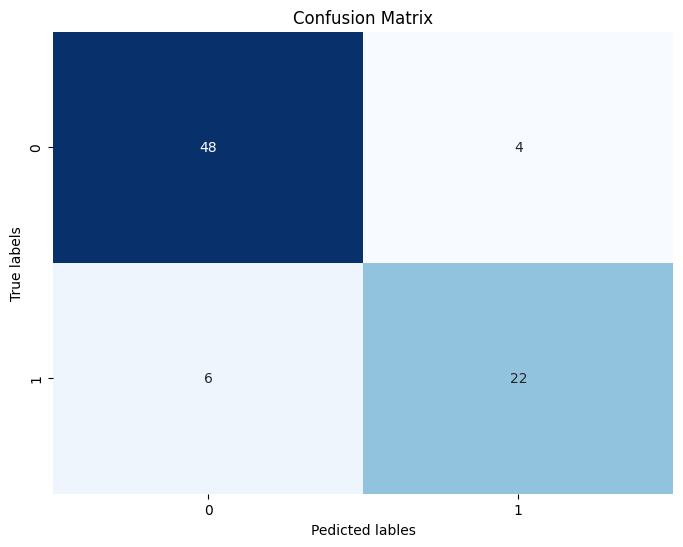

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        52
           1       0.85      0.79      0.81        28

    accuracy                           0.88        80
   macro avg       0.87      0.85      0.86        80
weighted avg       0.87      0.88      0.87        80



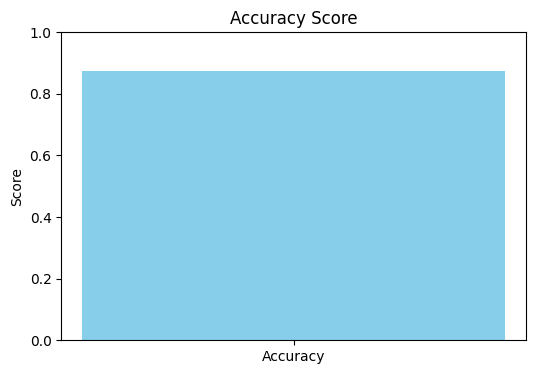

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#confusion matrix visualization
plt.figure(figsize=(8,6))
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Pedicted lables')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#classification report visualization
print('Classification Report : ')
print(report)

#Accuracy score visualization
plt.figure(figsize=(6,4))
plt.bar(['Accuracy'],[score], color = 'skyblue')
plt.title('Accuracy Score')
plt.ylabel('Score')
plt.ylim(0,1)
plt.show()

Plot the Decision Tree :

[Text(0.4642857142857143, 0.9642857142857143, 'x[2] <= 44.5\nentropy = 0.942\nsamples = 320\nvalue = [205, 115]'),
 Text(0.23214285714285715, 0.8928571428571429, 'x[3] <= 90500.0\nentropy = 0.688\nsamples = 234\nvalue = [191, 43]'),
 Text(0.3482142857142857, 0.9285714285714286, 'True  '),
 Text(0.07142857142857142, 0.8214285714285714, 'x[2] <= 36.5\nentropy = 0.225\nsamples = 193\nvalue = [186.0, 7.0]'),
 Text(0.03571428571428571, 0.75, 'entropy = 0.0\nsamples = 126\nvalue = [126, 0]'),
 Text(0.10714285714285714, 0.75, 'x[3] <= 67500.0\nentropy = 0.483\nsamples = 67\nvalue = [60, 7]'),
 Text(0.07142857142857142, 0.6785714285714286, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.14285714285714285, 0.6785714285714286, 'x[0] <= 15578509.0\nentropy = 0.734\nsamples = 34\nvalue = [27, 7]'),
 Text(0.10714285714285714, 0.6071428571428571, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.17857142857142858, 0.6071428571428571, 'x[0] <= 15752160.5\nentropy = 0.625\nsamples = 32\n

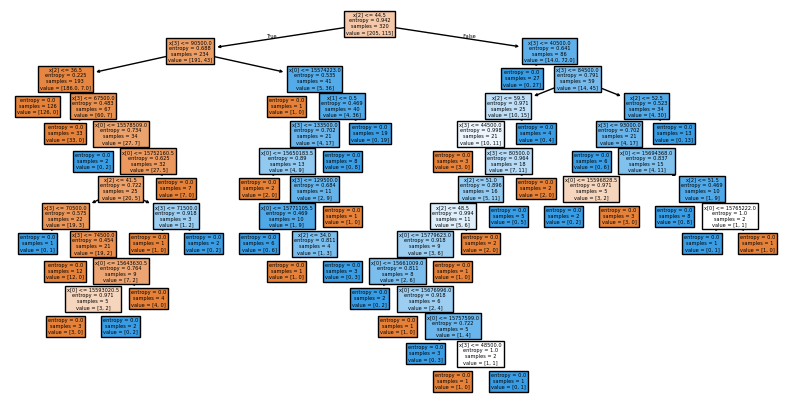

In [19]:
from sklearn import tree
plt.figure(figsize=(10,5))
tree.plot_tree(model,filled=True)